# Handwritten Character Recognition using Convolutional Neural Networks

## Description:
This project aims to demonstrate the use of Convolutional Neural Networks (CNNs) for recognising handwritten characters from the MNIST dataset. The MNIST dataset consists of 28x28 pixel grayscale images of handwritten digits (0-9). The goal is to train a CNN model to accurately classify these images into their respective digit classes.

## Tools and Technologies:
- Python
- TensorFlow
- Keras
- Jupyter Notebook

## Project Steps:
1. **Data Preparation:** Load the MNIST dataset and preprocess the images by normalizing pixel values.
2. **Model Building:** Construct a CNN model architecture using TensorFlow and Keras.
3. **Model Training:** Train the CNN model on the training dataset.
4. **Model Evaluation:** Evaluate the trained model's performance on the test dataset.
5. **Prediction:** Make predictions on unseen test images using the trained model.
6. **Visualization:** Visualize the model's predictions along with the corresponding true labels.


## Step 1: Install and Import Libraries

In [1]:
# Install necessary libraries
!pip install tensorflow matplotlib

# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

C:\Anaconda Feenah\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Step 2: Load and Preprocess Data

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to range between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


## Step 3: Build CNN Model Architecture

In [3]:
# Build the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Anaconda Feenah\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Step 4: Compile the Model

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5: Train the Model

In [5]:
# Train the model
history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=5, batch_size=32, validation_data=(test_images[..., tf.newaxis], test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9067 - loss: 0.3079 - val_accuracy: 0.9826 - val_loss: 0.0491
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9863 - loss: 0.0460 - val_accuracy: 0.9886 - val_loss: 0.0351
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9914 - loss: 0.0286 - val_accuracy: 0.9895 - val_loss: 0.0320
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9935 - loss: 0.0202 - val_accuracy: 0.9900 - val_loss: 0.0314
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9947 - loss: 0.0152 - val_accuracy: 0.9909 - val_loss: 0.0265


## Step 6: Evaluate the Model

In [6]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images[..., tf.newaxis], test_labels)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0341
Test accuracy: 0.9908999800682068


## Step 7: Make Predictions

In [7]:
# Make predictions on test images
predictions = model.predict(test_images[..., tf.newaxis])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


## Step 8: Visualization

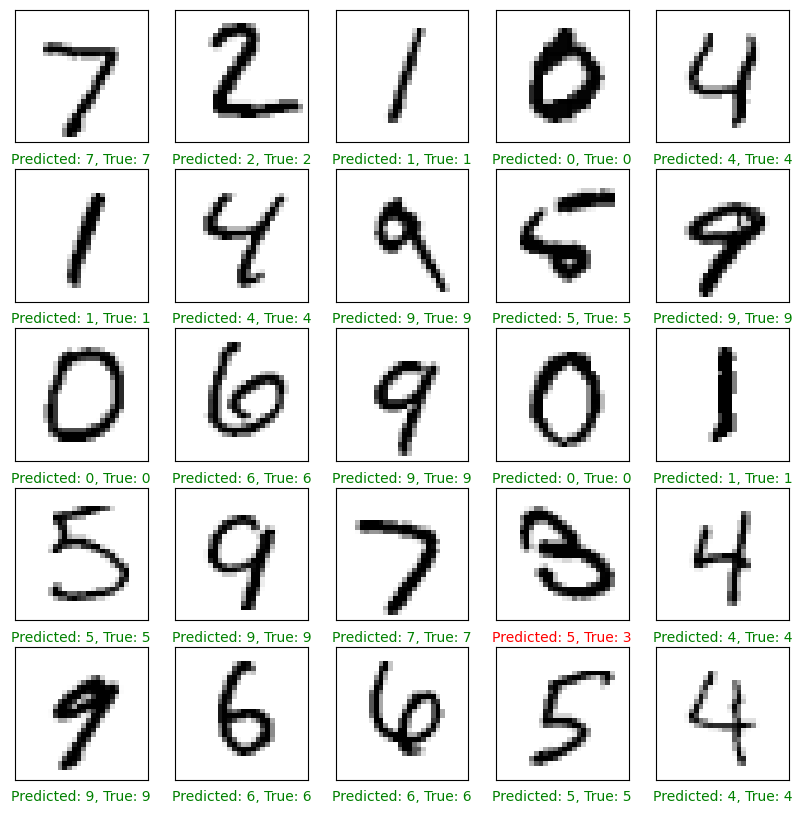

In [8]:
# Visualize the model's predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label}, True: {true_label}', color=color)
plt.show()

## Conclusion:
By leveraging CNNs, we can achieve accurate handwritten character recognition, which can have various applications such as digitizing historical documents, automated form processing, and handwriting recognition in digital devices.

## Next Steps:
- Experiment with different CNN architectures and hyperparameters to improve model performance.
- Explore other handwritten character datasets for broader applications.
- Deploy the trained model in real-world applications for character recognition tasks.